**Importing the dataset through Kaggle API**

In [ ]:
!pip install kaggle --quiet

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vignesh451845","key":"9a3ef922f86e29ed2cbaa6eed059fc21"}'}

In [ ]:
#create a kaggle directory
!mkdir ~/.kaggle

In [ ]:
#Copy kaggle.json file
!cp kaggle.json ~/.kaggle/

In [ ]:
ls -ltr ~/.kaggle/

total 4
-rw-r--r-- 1 root root 69 Sep 25 17:16 kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                        title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
mosapabdelghany/medical-insurance-cost-dataset             Medical Insurance Cost Dataset                          16425  2025-08-24 11:54:36.533000          14612        290  1.0              
zadafiyabhrami/global-crocodile-species-dataset            Global Crocodile Species Dataset                        57473  2025-08-26 08:46:11.950000           9624        273  1.0              
codebynadiia/gdp-per-country-20202025                      GDP per Country 2020–2025                                5677  2025-09-04 14:37:43.563000           7958        153  1.0              
saadaliyaseen/analyzing-studen

In [ ]:
! kaggle datasets list -s 'melanoma'

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
drscarlat/melanoma                                         melanoma                                         5649024274  2018-12-02 04:01:51.513000           5967         74  0.5625           
wanderdust/skin-lesion-analysis-toward-melanoma-detection  Melanoma Detection Dataset                      12143517511  2020-05-12 13:15:53.090000           8201        104  0.875            
cdeotte/melanoma-256x256                                   Melanoma TFRecords 256x256                        801038703  2020-07-10 04:01:10.993000           1883        171  0.5882353        
cdeotte/melanoma-384x384                

In [ ]:
! kaggle datasets download -d 'hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images'

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
  0% 0.00/98.7M [00:00<?, ?B/s]
100% 98.7M/98.7M [00:00<00:00, 1.69GB/s]


In [ ]:
! kaggle datasets download -d 'hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images' -p../data/melanoma-skin-cancer-dataset-of-10000-images


Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
  0% 0.00/98.7M [00:00<?, ?B/s]
100% 98.7M/98.7M [00:00<00:00, 1.29GB/s]


In [ ]:
ls -ltr ../data/melanoma-skin-cancer-dataset-of-10000-images

total 101084
-rw-r--r-- 1 root root 103508268 Mar 29  2022 melanoma-skin-cancer-dataset-of-10000-images.zip


In [ ]:
!unzip ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma-skin-cancer-dataset-of-10000-images.zip -d ../data/melanoma-skin-cancer-dataset-of-10000-images

Streaming output truncated to the last 5000 lines.
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train

In [ ]:
!chmod 755 ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/

In [ ]:
import pandas as pd

In [ ]:
!pwd


/content


In [ ]:
!ls ../data/
!ls ../data/melanoma-skin-cancer-dataset-of-10000-images/
!ls ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/


melanoma-skin-cancer-dataset-of-10000-images
melanoma_cancer_dataset  melanoma-skin-cancer-dataset-of-10000-images.zip
test  train


In [ ]:
!ls ../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/


test  train


In [ ]:
train_dir='../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'

In [ ]:
test_dir='../data/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'

**Fixing batch size and uniforming image size**

In [ ]:
batch_size = 32
img_size = (224, 224)

**Importing modules**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
#Load Datasets
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
)

Found 9605 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False,
)

Found 1000 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Names:", class_names)

Class Names: ['benign', 'malignant']


**Applying Augmentation**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# Data augmentation for training set
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Apply augmentation to training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                        num_parallel_calls=AUTOTUNE)

# Prefetch for better performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

**AS medical dataset are not unifrom setting weights Accordingly**

In [ ]:
# Compute class weights to solve imbalanced dataset
train_labels = np.concatenate([np.argmax(y, axis=1) for x, y in train_ds], axis=0)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: np.float64(0.9605), 1: np.float64(1.0428881650380022)}


**Building basic CNN layer**

In [ ]:
def build_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
input_shape = (224,224,3)
epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

results = {}

In [ ]:
cnn_model = build_cnn(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN with EarlyStopping and Class Weights
history = cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 119s 350ms/step - accuracy: 0.7655 - loss: 6.3517 - val_accuracy: 0.5000 - val_loss: 17.2410
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 127s 335ms/step - accuracy: 0.8237 - loss: 0.4725 - val_accuracy: 0.7810 - val_loss: 4.2545
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 326ms/step - accuracy: 0.8299 - loss: 0.3701 - val_accuracy: 0.8140 - val_loss: 2.5468
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 96s 318ms/step - accuracy: 0.8418 - loss: 0.3707 - val_accuracy: 0.8190 - val_loss: 3.2489
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 322ms/step - accuracy: 0.8378 - loss: 0.4359 - val_accuracy: 0.8000 - val_loss: 0.7526
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 141s 319ms/step - accuracy: 0.8311 - loss: 0.3816 - val_accuracy: 0.8870 - val_loss: 0.3556
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 143s 321ms/step - accuracy: 0.8407 - loss: 0.3661 - val_accuracy: 0.8750 - val_loss: 0.3287
Epoch 8/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 142s 325ms/step - accuracy: 0.8426 - l

In [ ]:
def evaluate_model(model, dataset, model_name):
    y_true = np.concatenate([np.argmax(y, axis=1) for x, y in dataset])
    y_pred_probs = model.predict(dataset)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"=== Classification Report: {model_name} ===")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
=== Classification Report: CNN ===
              precision    recall  f1-score   support

      benign       0.87      0.86      0.87       500
   malignant       0.86      0.88      0.87       500

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



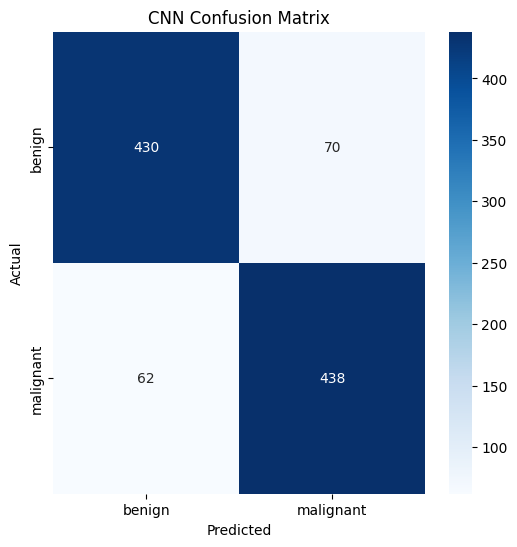

In [ ]:
evaluate_model(cnn_model, test_ds, "CNN")

**Adding Early Stopping and reducing learnign rate **

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
input_shape = (224,224,3)
epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(

    monitor='val_loss',  # Watch validation loss
    factor=0.5,           # Reduce LR by 50%
    patience=3,           # Wait 3 epochs before reducing
    verbose=1             # Print updates
)

results = {}

In [ ]:
cnn_model = build_cnn(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN with EarlyStopping and Class Weights
history = cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping,lr_scheduler])

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 113s 340ms/step - accuracy: 0.7755 - loss: 7.0894 - val_accuracy: 0.7710 - val_loss: 2.1044 - learning_rate: 0.0010
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 324ms/step - accuracy: 0.8468 - loss: 0.3768 - val_accuracy: 0.8100 - val_loss: 1.6348 - learning_rate: 0.0010
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 324ms/step - accuracy: 0.8518 - loss: 0.3831 - val_accuracy: 0.8370 - val_loss: 2.4793 - learning_rate: 0.0010
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 96s 317ms/step - accuracy: 0.8503 - loss: 0.3505 - val_accuracy: 0.8400 - val_loss: 1.5055 - learning_rate: 0.0010
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 320ms/step - accuracy: 0.8555 - loss: 0.3417 - val_accuracy: 0.8630 - val_loss: 1.3431 - learning_rate: 0.0010
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 323ms/step - accuracy: 0.8366 - loss: 0.5164 - val_accuracy: 0.7750 - val_loss: 1.0172 - learning_rate: 0.0010
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 321ms/step - accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
=== Classification Report: CNN ===
              precision    recall  f1-score   support

      benign       0.87      0.92      0.89       500
   malignant       0.92      0.86      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



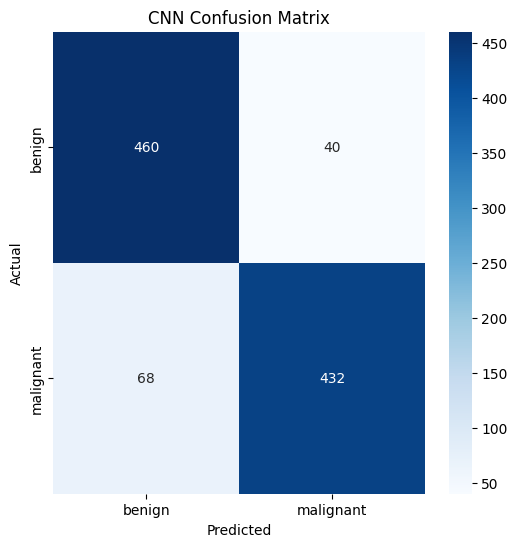

In [ ]:
evaluate_model(cnn_model, test_ds, "CNN")

**Applying RESNET 50**

In [ ]:
# resnet 20
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load pretrained ResNet50 (without the top classification layer)
base_model = ResNet50(
    weights="imagenet",       # pretrained on ImageNet
    include_top=False,        # exclude the final FC layer
    input_shape=(224, 224, 3) # match your image size
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),    # flatten features
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(2, activation="sigmoid")  # binary classification (benign vs malignant)
])


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(
    x=train_ds,
    validation_data=test_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping,lr_scheduler]

)

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 120s 350ms/step - accuracy: 0.5450 - loss: 0.7366 - val_accuracy: 0.6060 - val_loss: 0.6419 - learning_rate: 0.0010
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 325ms/step - accuracy: 0.6460 - loss: 0.6324 - val_accuracy: 0.6610 - val_loss: 0.5875 - learning_rate: 0.0010
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 141s 324ms/step - accuracy: 0.6739 - loss: 0.6013 - val_accuracy: 0.6380 - val_loss: 0.5708 - learning_rate: 0.0010
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 323ms/step - accuracy: 0.6697 - loss: 0.5878 - val_accuracy: 0.7250 - val_loss: 0.5318 - learning_rate: 0.0010
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 143s 325ms/step - accuracy: 0.7200 - loss: 0.5605 - val_accuracy: 0.7750 - val_loss: 0.4969 - learning_rate: 0.0010
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 322ms/step - accuracy: 0.7271 - loss: 0.5388 - val_accuracy: 0.7460 - val_loss: 0.5004 - learning_rate: 0.0010
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 322ms/step - accuracy: 

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step
=== Classification Report: Resnet50 ===
              precision    recall  f1-score   support

      benign       0.83      0.81      0.82       500
   malignant       0.81      0.84      0.83       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



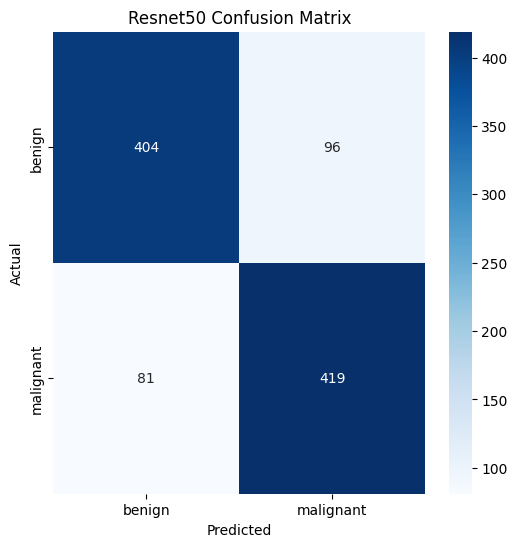

In [ ]:
evaluate_model(model,test_ds,"Resnet50")

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step
=== Classification Report: CNN ===
              precision    recall  f1-score   support

      benign       0.78      0.87      0.82       500
   malignant       0.85      0.76      0.80       500

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



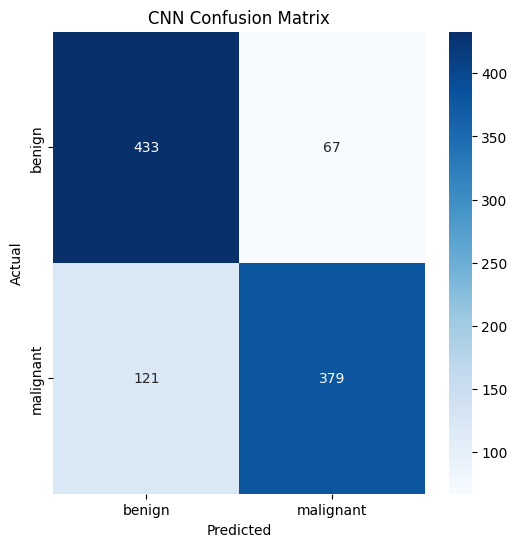

In [ ]:
evaluate_model(model, test_ds, "CNN")

**Increasing patience based on previous observation**

In [ ]:
input_shape = (224,224,3)
epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(

    monitor='val_loss',  # Watch validation loss
    factor=0.5,           # Reduce LR by 50%
    patience=3,           # Wait 3 epochs before reducing
    verbose=1             # Print updates
)

results = {}

In [ ]:
cnn_model = build_cnn(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN with EarlyStopping and Class Weights
history = cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping,lr_scheduler])

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 112s 341ms/step - accuracy: 0.7792 - loss: 4.8048 - val_accuracy: 0.5060 - val_loss: 30.0136 - learning_rate: 0.0010
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 99s 327ms/step - accuracy: 0.8526 - loss: 0.3577 - val_accuracy: 0.7320 - val_loss: 7.5999 - learning_rate: 0.0010
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 98s 324ms/step - accuracy: 0.8487 - loss: 0.3708 - val_accuracy: 0.8590 - val_loss: 1.7264 - learning_rate: 0.0010
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 322ms/step - accuracy: 0.8454 - loss: 0.5239 - val_accuracy: 0.8330 - val_loss: 0.5470 - learning_rate: 0.0010
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 143s 326ms/step - accuracy: 0.8009 - loss: 0.5835 - val_accuracy: 0.8020 - val_loss: 1.8549 - learning_rate: 0.0010
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 99s 327ms/step - accuracy: 0.8299 - loss: 0.3903 - val_accuracy: 0.8490 - val_loss: 0.8307 - learning_rate: 0.0010
Epoch 7/20
300/301 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
=== Classification Report: CNN ===
              precision    recall  f1-score   support

      benign       0.86      0.95      0.90       500
   malignant       0.94      0.85      0.89       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



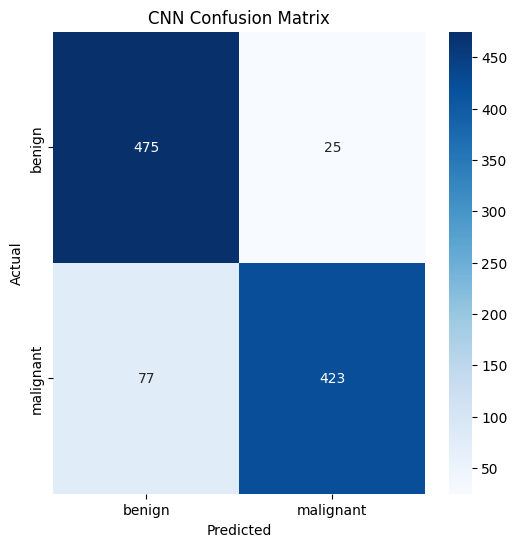

In [ ]:
evaluate_model(cnn_model, test_ds, "CNN")

**Appplying Checkpoint**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 125s 361ms/step - accuracy: 0.5249 - loss: 0.7341 - val_accuracy: 0.5760 - val_loss: 0.6775
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 99s 325ms/step - accuracy: 0.5693 - loss: 0.6780 - val_accuracy: 0.7220 - val_loss: 0.6378
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 100s 331ms/step - accuracy: 0.6177 - loss: 0.6512 - val_accuracy: 0.7010 - val_loss: 0.5974
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 99s 329ms/step - accuracy: 0.6533 - loss: 0.6169 - val_accuracy: 0.7560 - val_loss: 0.5545
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 99s 328ms/step - accuracy: 0.6948 - loss: 0.5881 - val_accuracy: 0.7850 - val_loss: 0.5375
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 99s 325ms/step - accuracy: 0.7009 - loss: 0.5762 - val_accuracy: 0.7470 - val_loss: 0.5335
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 101s 333ms/step - accuracy: 0.7169 - loss: 0.5630 - val_accuracy: 0.7430 - val_loss: 0.5318
Epoch 8/20
301/301 ━━━━━━━━━━

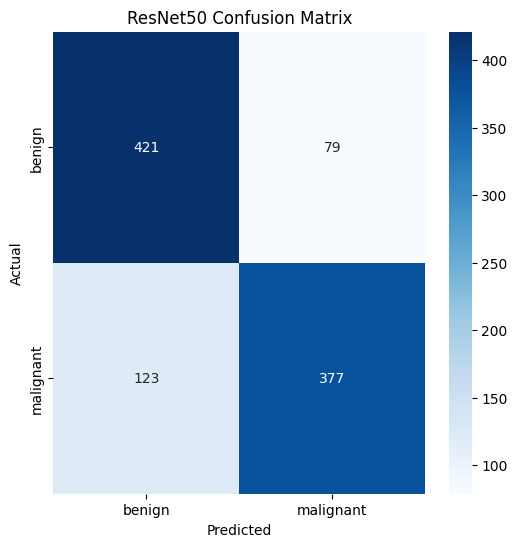

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_base.trainable = False  # Freeze base layers

# Build transfer learning model
resnet_model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
resnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model with EarlyStopping and class weights
history = resnet_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping]
)


# Evaluate model
evaluate_model(resnet_model, test_ds, "ResNet50")

# Save history
results["ResNet50"] = history.history

In [ ]:
lr_scheduler = ReduceLROnPlateau(

    monitor='val_loss',  # Watch validation loss
    factor=0.5,           # Reduce LR by 50%
    patience=3,           # Wait 3 epochs before reducing
    verbose=1             # Print updates
)

results = {}

**Applying VGG16**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/12
301/301 ━━━━━━━━━━━━━━━━━━━━ 127s 369ms/step - accuracy: 0.7252 - loss: 0.5315 - val_accuracy: 0.8490 - val_loss: 0.3454 - learning_rate: 0.0010
Epoch 2/12
301/301 ━━━━━━━━━━━━━━━━━━━━ 107s 355ms/step - accuracy: 0.8181 - loss: 0.4026 - val_accuracy: 0.8710 - val_loss: 0.3036 - learning_rate: 0.0010
Epoch 3/12
301/301 ━━━━━━━━━━━━━━━━━━━━ 105s 348ms/step - accuracy: 0.8435 - loss: 0.3619 - val_accuracy: 0.8900 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 4/12
301/301 ━━━━━━━━━━━━━━━━━━━━ 105s 348ms/step - accuracy: 0.8533 - loss: 0.3410 - val_accuracy: 0.8880 - val_loss: 0.2712 - learning_rate: 0.0010
Epoch 5/12
301/301 ━━━━━━━━━━━━━━━━━━━━ 143s 352ms/step - accuracy: 0.8585 - loss: 0.3283 - val_accuracy: 0.8900 - val_loss: 0.2613 - learning_rate: 0.0010
Epoch 6/12
301/301 ━━━━━━━━━━━━━━━━━━━━ 104s 345ms/step - accuracy: 0.8636 - loss: 0.3240 - val_accuracy: 0.8960 - val_loss: 0.2606 - learning_rate: 0.0010
Epoch 7/12
30

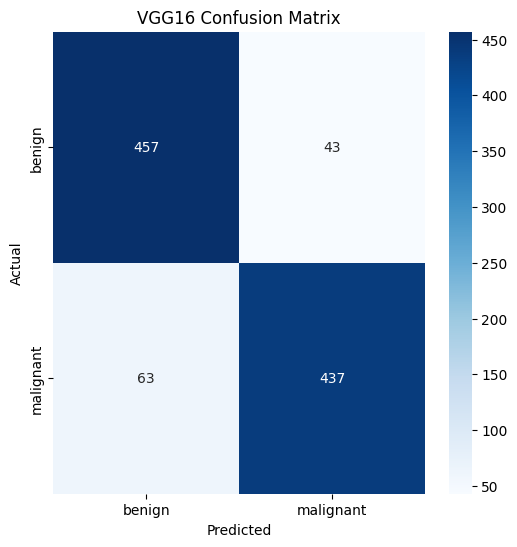

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Load VGG16 without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
vgg_base.trainable = False  # Freeze base layers

# Build transfer learning model
vgg_model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
vgg_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train model
history = vgg_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=12,
    class_weight=class_weights,
    callbacks=[early_stopping,lr_scheduler,checkpoint]
)



# Evaluate model
evaluate_model(vgg_model, test_ds, "VGG16")

# Save history
results["VGG16"] = history.history

In [ ]:
cnn_model = build_cnn(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN with EarlyStopping and Class Weights
history = cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stopping,lr_scheduler,checkpoint])

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 108s 327ms/step - accuracy: 0.7874 - loss: 6.5684 - val_accuracy: 0.5290 - val_loss: 11.2290 - learning_rate: 0.0010
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 97s 321ms/step - accuracy: 0.8344 - loss: 0.4679 - val_accuracy: 0.8580 - val_loss: 1.9209 - learning_rate: 0.0010
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 96s 318ms/step - accuracy: 0.8492 - loss: 0.3673 - val_accuracy: 0.8790 - val_loss: 1.3011 - learning_rate: 0.0010
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 141s 314ms/step - accuracy: 0.8538 - loss: 0.3523 - val_accuracy: 0.8280 - val_loss: 2.4668 - learning_rate: 0.0010
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 95s 314ms/step - accuracy: 0.8250 - loss: 0.6353 - val_accuracy: 0.8300 - val_loss: 1.2705 - learning_rate: 0.0010
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 94s 308ms/step - accuracy: 0.8338 - loss: 0.4149 - val_accuracy: 0.8560 - val_loss: 0.5292 - learning_rate: 0.0010
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy:

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
=== Classification Report: ResNet50 ===
              precision    recall  f1-score   support

      benign       0.88      0.88      0.88       500
   malignant       0.88      0.88      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



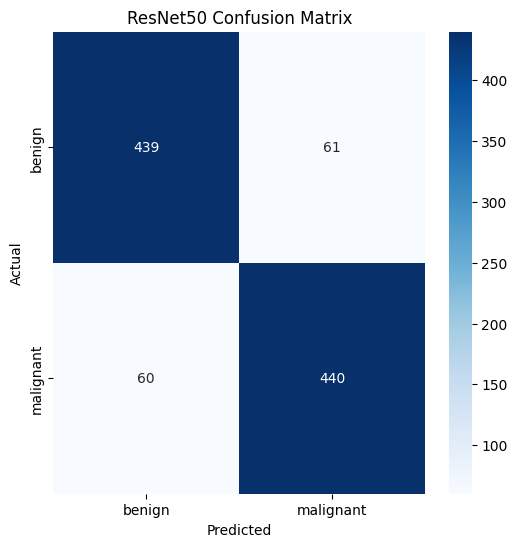

In [ ]:
evaluate_model(cnn_model, test_ds, "ResNet50")

**ENSEMBLING**

In [ ]:
import numpy as np

def ensemble_predict(models, dataset, weights=None):
    """
    Generate ensemble predictions from multiple models.

    Args:
        models: list of trained models
        dataset: tf.data.Dataset for evaluation
        weights: list of weights (optional, default = equal averaging)

    Returns:
        final_probs: averaged class probabilities
        final_preds: final class predictions (argmax)
    """
    preds = []

    # Collect softmax predictions from each model
    for model in models:
        p = model.predict(dataset, verbose=0)
        preds.append(p)

    preds = np.array(preds)  # shape: (n_models, n_samples, n_classes)

    # Weighted average or simple mean
    if weights:
        weights = np.array(weights) / np.sum(weights)
        final_probs = np.tensordot(weights, preds, axes=(0,0))
    else:
        final_probs = np.mean(preds, axis=0)

    # Convert probabilities to class predictions
    final_preds = np.argmax(final_probs, axis=1)

    return final_probs, final_preds


In [ ]:
final_probs, final_preds = ensemble_predict([vgg_model, cnn_model], test_ds)


In [ ]:
final_probs,final_preds=ensemble_predict([vgg_model,cnn_model,model],test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step
=== Classification Report: VGG16 ===
              precision    recall  f1-score   support

      benign       0.88      0.91      0.90       500
   malignant       0.91      0.87      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



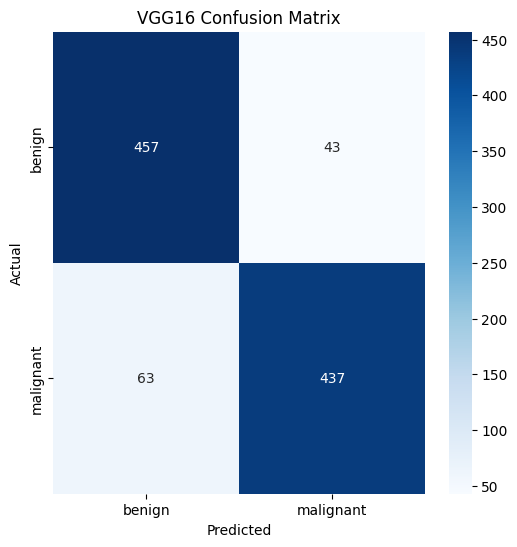

In [ ]:
evaluate_model(vgg_model, test_ds, "VGG16")

In [ ]:
def evaluate_ensemble(dataset, final_preds, model_name="Ensemble"):
    # True labels
    y_true = np.concatenate([np.argmax(y, axis=1) for x, y in dataset])

    print(f"=== Classification Report: {model_name} ===")
    print(classification_report(y_true, final_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, final_preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


=== Classification Report: VGG16 + CNN Ensemble ===
              precision    recall  f1-score   support

      benign       0.89      0.91      0.90       500
   malignant       0.90      0.89      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



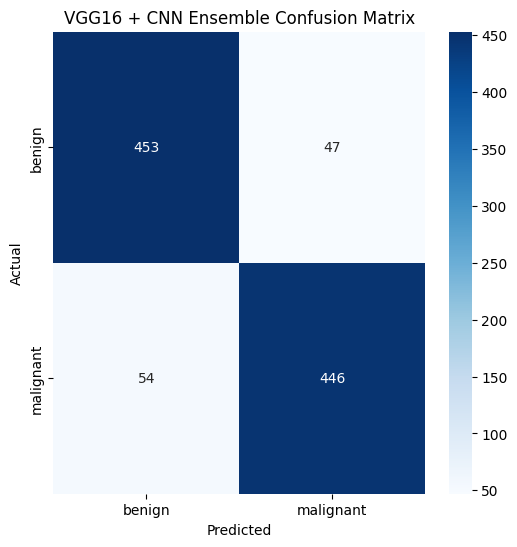

In [ ]:
evaluate_ensemble(test_ds, final_preds, model_name="VGG16 + CNN Ensemble")

**applying on VGG+CNN +resnet**

=== Classification Report: VGG16 + CNN Ensemble+resnet ===
              precision    recall  f1-score   support

      benign       0.89      0.90      0.90       500
   malignant       0.90      0.89      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



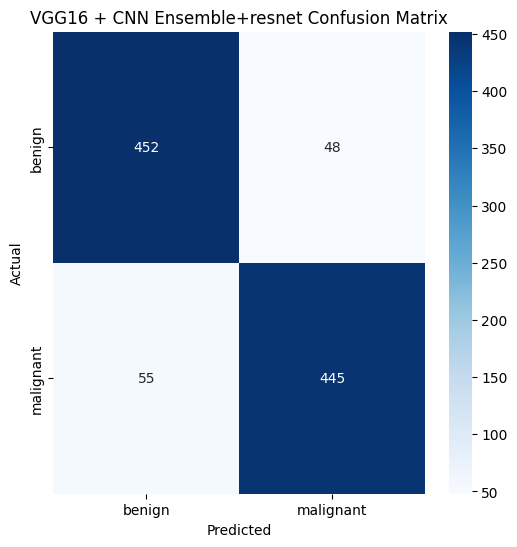

In [ ]:
evaluate_ensemble(test_ds, final_preds, model_name="VGG16 + CNN Ensemble+resnet")